TITLE

Intro: When did we lose creativity? That fearless joy of building something out of nothing, driven not by rules but by imagination? Minecraft was the first game I ever played, and it captured that feeling perfectly—the sense of infinite possibility, where blocks became castles, caves became mysteries, and the only limit was what you could dream up. Years later, I’ve found a surprisingly similar feeling in coding. Though I’m still learning, coding has rekindled that spark of creativity through the logic of making, breaking, and reshaping digital worlds. This project focuses on web scraping and analyzing mob drop from minewraft wiki. MThis project scrapes the Minecraft Wiki to analyze mob drops—the items creatures leave behind when defeated. My goal is twofold:

Technical: Can I extract, clean, and visualize this data to uncover trends? (Which mobs are the most "valuable"? Do drop rates follow predictable distributions?)
Philosophical: Can data analysis feel as creative as building a castle in Survival mode?

By treating the wiki as a "digital biome," I hope to show how coding can be both analytical and imaginative—a tool for discovery, just like a trusty diamond pickaxe.

In [11]:
from IPython.display import Audio
import os

Audio("/Users/Jay/Desktop/chickenlava.mp3")

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn')

/var/folders/sv/g935xvm15h94cpw7qwgcs82c0000gn/T/ipykernel_64729/3562341708.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Loading the Data

I scraped three datasets from the Minecraft Wiki:
-Mob drop from passive
-neutral
-hostile

Let's load and inspect the data

/var/folders/sv/g935xvm15h94cpw7qwgcs82c0000gn/T/ipykernel_64729/1152690410.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis", ax=ax1)


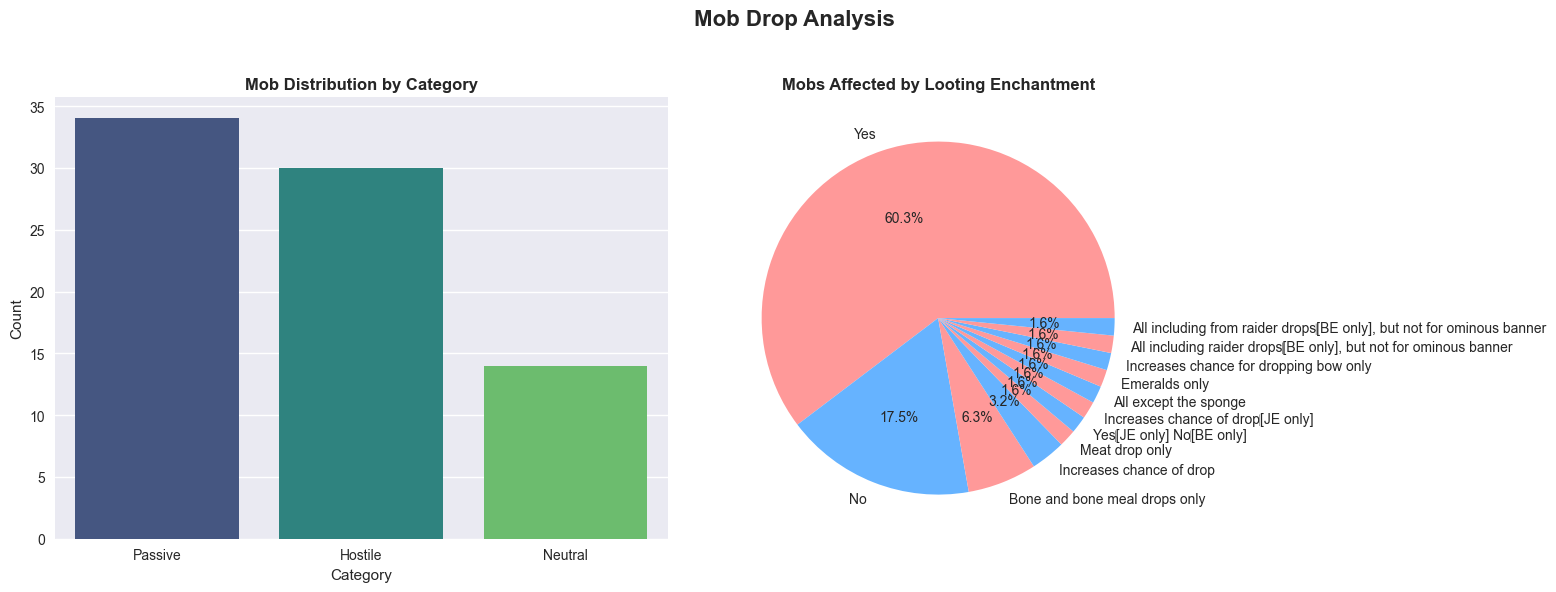

/var/folders/sv/g935xvm15h94cpw7qwgcs82c0000gn/T/ipykernel_64729/1152690410.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/sv/g935xvm15h94cpw7qwgcs82c0000gn/T/ipykernel_64729/1152690410.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["No Effect", "Has Effect"], y=status_effect_counts.values,


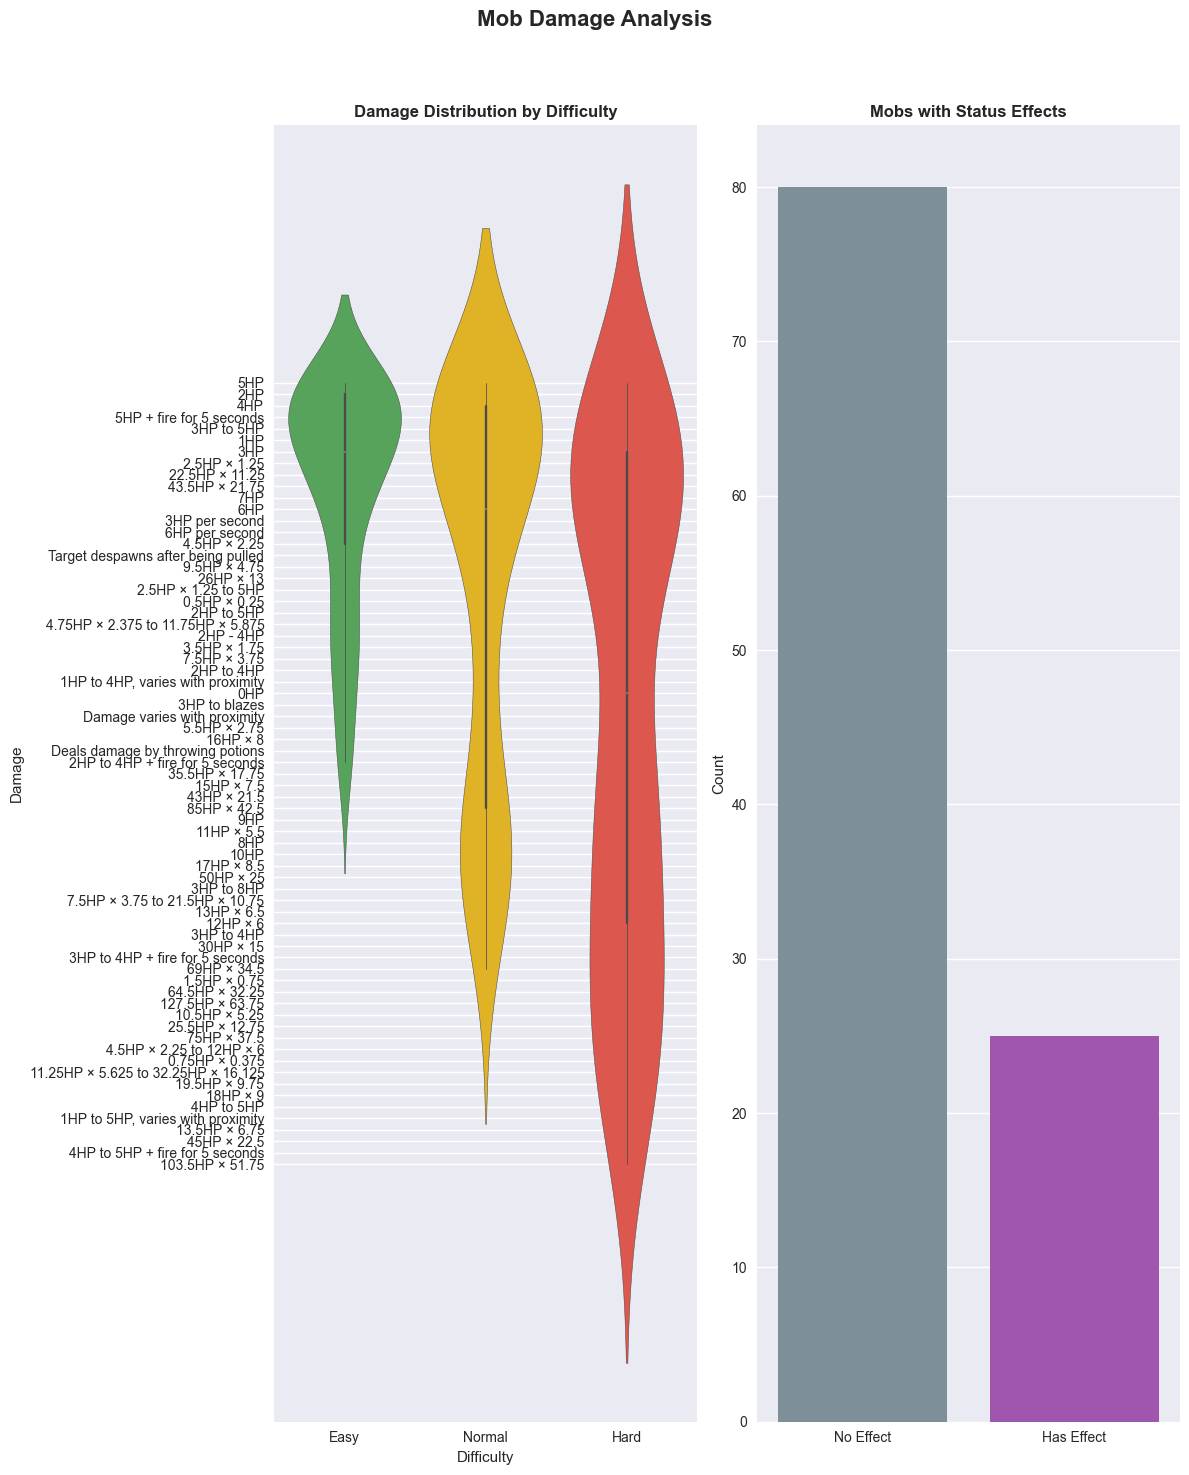

Skipping label for mob axolotl: invalid Difficulty Hard or Exp
Skipping label for mob bee: invalid Difficulty Hard or Exp
Skipping label for mob cat: invalid Difficulty Hard or Exp
Skipping label for mob dolphin: invalid Difficulty Hard or Exp
Skipping label for mob drowned: invalid Difficulty Hard or Exp
Skipping label for mob enderman: invalid Difficulty Hard or Exp
Skipping label for mob endermite: invalid Difficulty Hard or Exp
Skipping label for mob fox: invalid Difficulty Hard or Exp
Skipping label for mob frog: invalid Difficulty Hard or Exp
Skipping label for mob giant‌: invalid Difficulty Hard or Exp
Skipping label for mob goat: invalid Difficulty Hard or Exp
Skipping label for mob iron golem: invalid Difficulty Hard or Exp
Skipping label for mob ocelot: invalid Difficulty Hard or Exp
Skipping label for mob panda: invalid Difficulty Hard or Exp
Skipping label for mob polar bear: invalid Difficulty Hard or Exp
Skipping label for mob silverfish: invalid Difficulty Hard or Exp
Sk

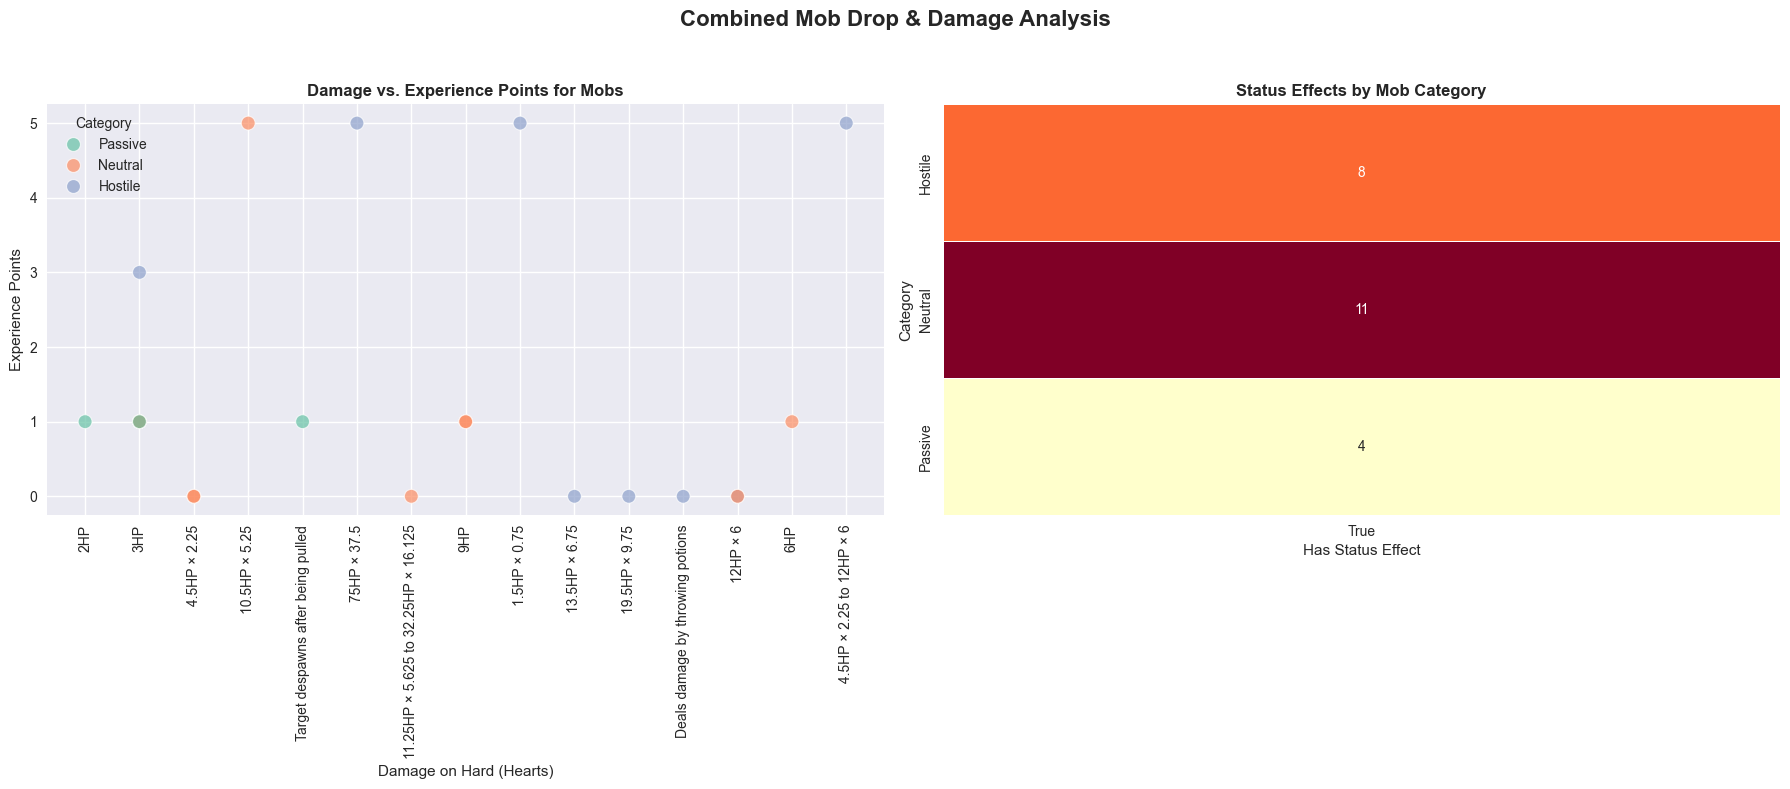

/var/folders/sv/g935xvm15h94cpw7qwgcs82c0000gn/T/ipykernel_64729/1152690410.py:245: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[indices], y=features, palette="viridis", ax=ax1)
/var/folders/sv/g935xvm15h94cpw7qwgcs82c0000gn/T/ipykernel_64729/1152690410.py:283: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_series.index, y=coef_series.values, palette=colors, ax=ax3)


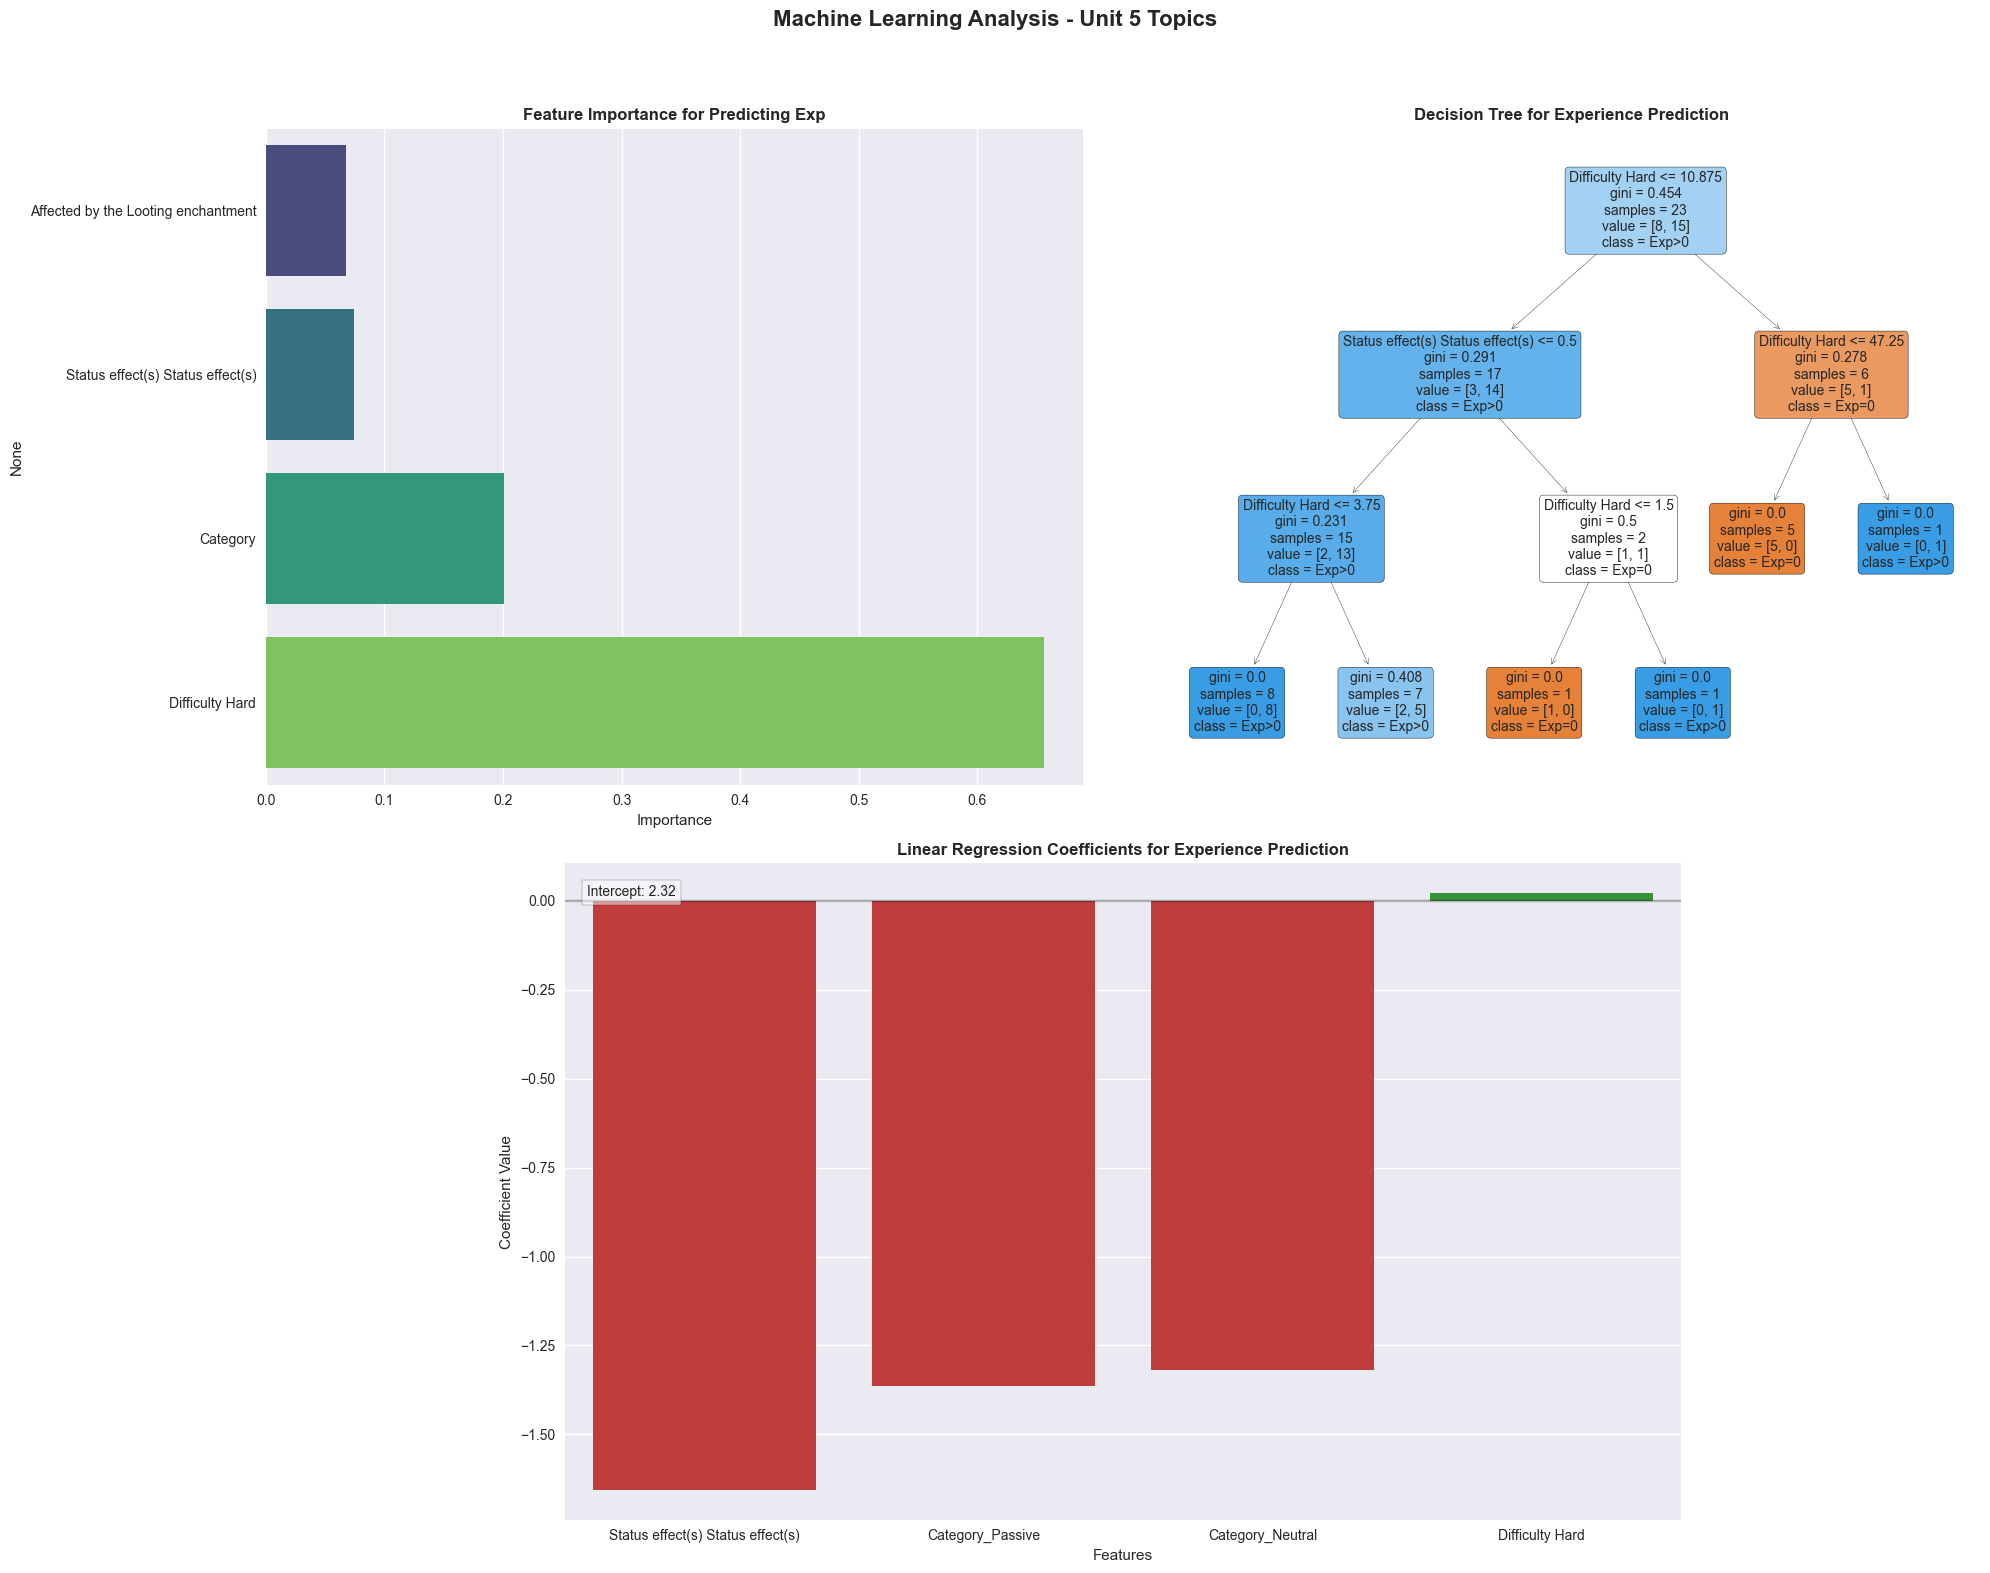

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np

def load_data():
    """Load and preprocess all data files"""
    # Load CSVs
    passive_df = pd.read_csv("passive_mobs.csv")
    neutral_df = pd.read_csv("neutral_mobs.csv")
    hostile_df = pd.read_csv("hostile_mobs.csv")
    damage_df = pd.read_csv("mob_damage.csv")
    
    # Add category columns
    passive_df["Category"] = "Passive"
    neutral_df["Category"] = "Neutral"
    hostile_df["Category"] = "Hostile"
    
    # Combine all mob drop data
    drops_df = pd.concat([passive_df, neutral_df, hostile_df], ignore_index=True)
    
    # Standardize mob names
    drops_df["Mob"] = drops_df["Mob"].str.strip().str.lower()
    damage_df["Mob Mob"] = damage_df["Mob Mob"].str.strip().str.lower()
    
    return drops_df, damage_df

def merge_datasets(drops_df, damage_df):
    """Merge the datasets in different ways as needed for analysis"""
    # Merge with selected columns for analysis
    combined_df = pd.merge(
        drops_df, 
        damage_df.rename(columns={
            "Mob Mob": "Mob",
            "Difficulty Normal": "Damage",
            "Status effect(s) Status effect(s)": "Status_Effect"
        }),
        on="Mob", 
        how="inner"
    )
    
    # More detailed merge for machine learning
    merged_df = pd.merge(
        damage_df[["Mob Mob", "Difficulty Hard", "Status effect(s) Status effect(s)"]],
        drops_df[["Mob", "Exp", "Category", "Affected by the Looting enchantment"]],
        left_on="Mob Mob",
        right_on="Mob",
        how="inner"
    )
    
    # Clean Experience column
    merged_df["Exp"] = merged_df["Exp"].apply(clean_exp)
    
    return combined_df, merged_df

def clean_exp(x):
    """Clean Experience values"""
    if pd.isna(x) or str(x).strip() in ["0", "", "None"]:
        return 0.0
    try:
        # Split on en dash or hyphen
        return float(str(x).split("–")[0].split("-")[0])
    except:
        return 0.0

def clean_difficulty(value):
    """Clean difficulty values for analysis"""
    if isinstance(value, str):
        # Remove HP if present
        value = value.replace("HP", "")
        # Handle multiplication cases (take first value)
        if "×" in value:
            return float(value.split("×")[0].strip())
        # Handle other cases
        try:
            return float(value)
        except:
            return 0.0  # Default value if conversion fails
    return float(value)

def plot_mob_drops(drops_df):
    """Group 1: Mob Drop Analysis (graphs 1 & 2)"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    plt.suptitle("Mob Drop Analysis", fontsize=16, fontweight="bold")
    
    # Graph 1: Category Distribution
    category_counts = drops_df["Category"].value_counts()
    sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis", ax=ax1)
    ax1.set_title("Mob Distribution by Category", fontweight="bold")
    ax1.set_xlabel("Category")
    ax1.set_ylabel("Count")
    
    # Graph 2: Looting Enchantment Pie Chart
    looting_counts = drops_df["Affected by the Looting enchantment"].value_counts()
    ax2.pie(looting_counts, labels=looting_counts.index, 
            autopct="%1.1f%%", colors=["#ff9999", "#66b3ff"])
    ax2.set_title("Mobs Affected by Looting Enchantment", fontweight="bold")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def plot_mob_damage(damage_df):
    """Group 2: Mob Damage Analysis (graphs 3 & 4)"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 15))
    plt.suptitle("Mob Damage Analysis", fontsize=16, fontweight="bold")
    
    # Graph 3: Damage Distribution
    # Reshape damage_df for the violin plot
    melted_damage_df = pd.melt(
        damage_df,
        id_vars=["Mob Mob"],
        value_vars=["Difficulty Easy", "Difficulty Normal", "Difficulty Hard"],
        var_name="Difficulty",
        value_name="Damage"
    )
    
    # Clean up Difficulty column 
    melted_damage_df["Difficulty"] = melted_damage_df["Difficulty"].replace({
        "Difficulty Easy": "Easy",
        "Difficulty Normal": "Normal",
        "Difficulty Hard": "Hard"
    })
    
    sns.violinplot(
        data=melted_damage_df,
        x="Difficulty",
        y="Damage",
        palette=["#4CAF50", "#FFC107", "#F44336"],
        order=["Easy", "Normal", "Hard"],
        ax=ax1
    )
    ax1.set_title("Damage Distribution by Difficulty", fontweight="bold")
    ax1.set_xlabel("Difficulty")
    ax1.set_ylabel("Damage")
    
    # Graph 4: Status Effects
    status_effect_counts = (damage_df["Status effect(s) Status effect(s)"] != "No").value_counts()
    status_effect_counts = status_effect_counts.reindex([False, True], fill_value=0)
    
    sns.barplot(x=["No Effect", "Has Effect"], y=status_effect_counts.values, 
                palette=["#78909C", "#AB47BC"], ax=ax2)
    ax2.set_title("Mobs with Status Effects", fontweight="bold")
    ax2.set_ylabel("Count")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def plot_mixed_analysis(merged_df, combined_df):
    """Group 3: Mixed Analysis of Mob Drops & Damage (graphs 5 & 6)"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    plt.suptitle("Combined Mob Drop & Damage Analysis", fontsize=16, fontweight="bold")
    
    # Graph 5: Damage vs Experience Points
    if len(merged_df) > 0:
        sns.scatterplot(
            x="Difficulty Hard",
            y="Exp",
            hue="Category",
            palette="Set2",
            data=merged_df,
            s=100,
            alpha=0.7,
            ax=ax1
        )
        
        # Add text labels for mobs
        for i, row in merged_df.iterrows():
            try:
                x = float(row["Difficulty Hard"]) + 0.5
                y = float(row["Exp"])
                ax1.text(x, y, row["Mob"], fontsize=8)
            except (ValueError, TypeError):
                print(f"Skipping label for mob {row['Mob']}: invalid Difficulty Hard or Exp")
                
        ax1.set_title("Damage vs. Experience Points for Mobs", fontweight="bold")
        ax1.set_xlabel("Damage on Hard (Hearts)")
        ax1.set_ylabel("Experience Points")
        ax1.tick_params(axis='x', rotation=90)
        
    else:
        ax1.text(0.5, 0.5, "No data available", ha='center', va='center')
    
    # Graph 6: Category Status Heatmap
    heatmap_data = pd.crosstab(combined_df["Category"], 
                              combined_df["Status_Effect"].notna())
    
    sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd", 
                linewidths=0.5, cbar=False, ax=ax2)
    ax2.set_title("Status Effects by Mob Category", fontweight="bold")
    ax2.set_xlabel("Has Status Effect")
    ax2.set_ylabel("Category")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def prepare_ml_features(merged_df):
    """Prepare features for machine learning models"""
    X = merged_df[["Difficulty Hard", "Category", "Status effect(s) Status effect(s)", "Affected by the Looting enchantment"]]
    X = X.copy()  # Avoid SettingWithCopyWarning
    
    # Clean numeric features
    X["Difficulty Hard"] = X["Difficulty Hard"].apply(clean_difficulty)
    
    # Encode categorical features
    X["Category"] = LabelEncoder().fit_transform(X["Category"])
    X["Status effect(s) Status effect(s)"] = (X["Status effect(s) Status effect(s)"] != "No").astype(int)
    X["Affected by the Looting enchantment"] = X["Affected by the Looting enchantment"].map({
        "Yes": 1, "No": 0, "Unknown": 0
    }).fillna(0)
    
    y = merged_df["Exp"]
    
    return X, y

def plot_ml_analysis(merged_df):
    """Group 4: Machine Learning Analysis (graphs 7, 8 & 9)"""
    if len(merged_df) == 0:
        print("Skipping ML analysis: merged_df is empty.")
        return
        
    fig = plt.figure(figsize=(20, 16))
    plt.suptitle("Machine Learning Analysis - Unit 5 Topics", fontsize=16, fontweight="bold")
    
    # Set up grid for different sized plots
    gs = fig.add_gridspec(2, 6)
    ax1 = fig.add_subplot(gs[0, :3])  # Top left - Random Forest
    ax2 = fig.add_subplot(gs[0, 3:])  # Top right - Decision Tree
    ax3 = fig.add_subplot(gs[1, 1:5])  # Bottom - Linear Regression
    
    # Graph 7: Random Forest Feature Importance
    X, y = prepare_ml_features(merged_df)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # Sort features by importance
    importance = rf.feature_importances_
    indices = np.argsort(importance)
    features = X.columns[indices]
    
    # Plot horizontally for better readability
    sns.barplot(x=importance[indices], y=features, palette="viridis", ax=ax1)
    ax1.set_title("Feature Importance for Predicting Exp", fontweight="bold")
    ax1.set_xlabel("Importance")
    
    # Graph 8: Decision Tree
    X_dt = merged_df[["Difficulty Hard", "Category", "Status effect(s) Status effect(s)"]]
    X_dt = X_dt.copy()
    
    X_dt["Difficulty Hard"] = X_dt["Difficulty Hard"].apply(clean_difficulty)
    X_dt["Category"] = LabelEncoder().fit_transform(X_dt["Category"])
    X_dt["Status effect(s) Status effect(s)"] = (X_dt["Status effect(s) Status effect(s)"] != "No").astype(int)
    
    y_dt = (merged_df["Exp"] > 0).astype(int)
    
    dt = DecisionTreeClassifier(max_depth=3, random_state=42)
    dt.fit(X_dt, y_dt)
    
    plot_tree(dt, feature_names=X_dt.columns, class_names=["Exp=0", "Exp>0"], 
              filled=True, rounded=True, fontsize=10, ax=ax2)
    ax2.set_title("Decision Tree for Experience Prediction", fontweight="bold")
    
    # Graph 9: Linear Regression Coefficients
    X_lr = merged_df[["Difficulty Hard", "Category", "Status effect(s) Status effect(s)"]]
    X_lr = pd.get_dummies(X_lr, columns=["Category"], drop_first=True)
    X_lr["Status effect(s) Status effect(s)"] = (X_lr["Status effect(s) Status effect(s)"] != "No").astype(int)
    X_lr["Difficulty Hard"] = X_lr["Difficulty Hard"].apply(clean_difficulty)
    
    y_lr = merged_df["Exp"]
    
    lr = LinearRegression()
    lr.fit(X_lr, y_lr)
    
    # Create coefficient plot
    coef_dict = dict(zip(X_lr.columns, lr.coef_))
    coef_series = pd.Series(coef_dict).sort_values()
    
    # Plot coefficients
    colors = ['#2ca02c' if x > 0 else '#d62728' for x in coef_series]
    sns.barplot(x=coef_series.index, y=coef_series.values, palette=colors, ax=ax3)
    ax3.set_title("Linear Regression Coefficients for Experience Prediction", fontweight="bold")
    ax3.set_xlabel("Features")
    ax3.set_ylabel("Coefficient Value")
    ax3.tick_params(axis='x', rotation=0)
    ax3.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    
    # Add intercept value as text
    ax3.text(0.02, 0.95, f"Intercept: {lr.intercept_:.2f}", transform=ax3.transAxes,
             bbox=dict(facecolor='white', alpha=0.5))
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def main():
    # Load data
    drops_df, damage_df = load_data()
    
    # Merge datasets
    combined_df, merged_df = merge_datasets(drops_df, damage_df)
    
    # Create the 4 grouped visualizations
    plot_mob_drops(drops_df)                  # Group 1: Graphs 1 & 2
    plot_mob_damage(damage_df)                # Group 2: Graphs 3 & 4
    plot_mixed_analysis(merged_df, combined_df) # Group 3: Graphs 5 & 6
    plot_ml_analysis(merged_df)               # Group 4: Graphs 7, 8 & 9

if __name__ == "__main__":
    main()

Analysis:

Conclusion 
Working on this project allowed me to bridge two things I care about: the creative spark I first discovered in Minecraft, and the growing curiosity I have for coding and data analysis.
What I found, both in the data and in the process of working with it, is that creativity can take many forms—even in something as seemingly technical as web scraping. Just like placing blocks in the game, writing code is a way of building something new. And just like mining in Minecraft, sometimes you dig for hours, only to strike something interesting when you least expect it.

This project began as a technical challenge but ended as a reminder: creativity thrives in constraints. Scraping the Minecraft Wiki felt like exploring a cave—I’d hit dead ends (404 errors), strike gold (clean datasets), and occasionally stumble upon a hidden lava pool (rate-limiting).

What did the data reveal?

The economic hierarchy of mobs (e.g., Endermen’s rare pearls vs. zombie flesh).
Statistical quirks (why do some drops defy probability?).
The sheer inefficiency of farming certain creatures—proof that even in a blocky universe, RNG reigns supreme.
But beyond the numbers, this project mirrored Minecraft’s core lesson: building something meaningful starts with curiosity. Whether placing blocks or writing loops, the joy is in the process. Next time I fight a Creeper, I’ll see more than an explosion—I’ll see a data point.

**Tips for players

*Want to try this analysis yourself? Check out the [GitHub repo](#) and run the code to explore

word count:....

![GENAI declaration.png](<attachment:GENAI declaration.png>)
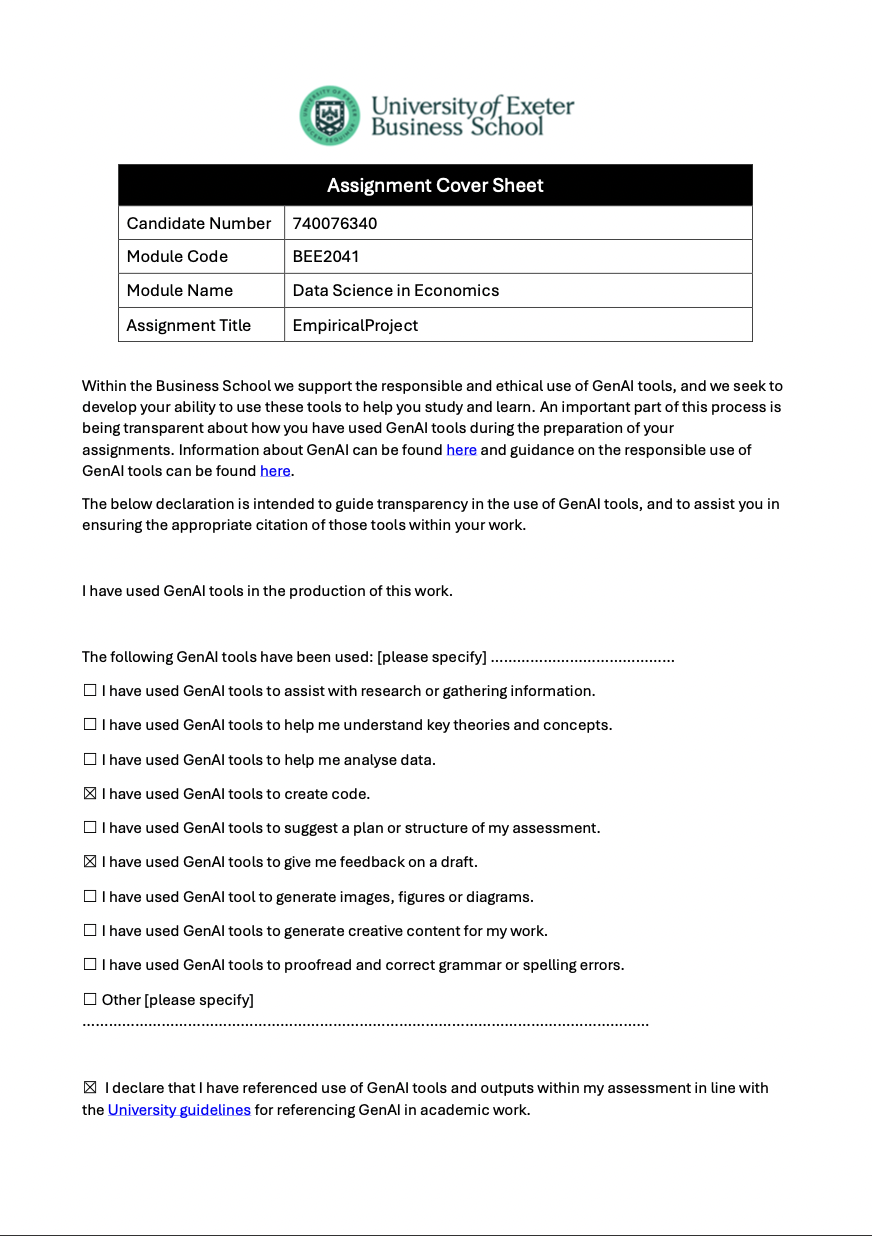